In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def plot_data_and_boundary(X, y, W, b, activation):
    plt.figure(figsize=(8, 6))
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label="Class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label="Class 1")
    
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = -(W[0] * x1 + b) / W[1]
    plt.plot(x1, x2, color='black', label="Decision Boundary")
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Data Points and Decision Boundary ({activation})")
    plt.legend()
    plt.grid()
    plt.show()

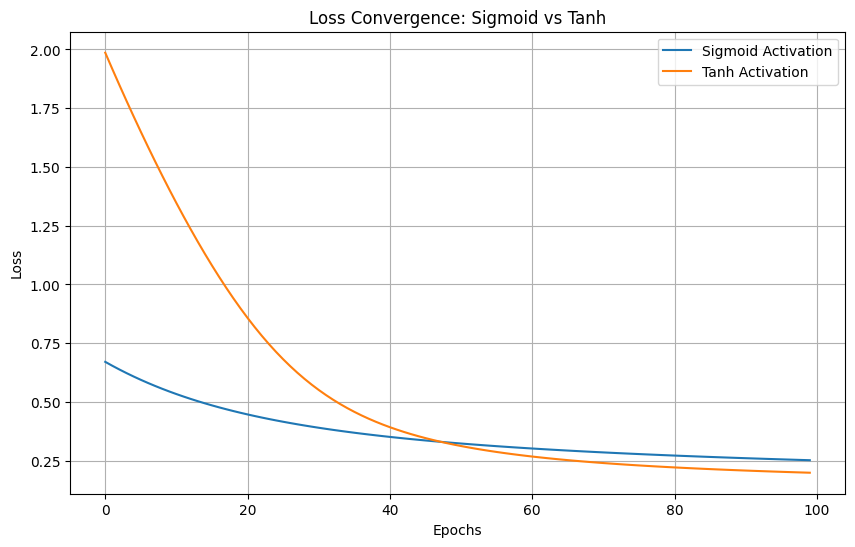

In [8]:
W_sigmoid = np.random.randn(2)
b_sigmoid = np.random.randn()
lr = 0.1
losses_sigmoid = []

for _ in range(100):
    z = np.dot(X, W_sigmoid) + b_sigmoid
    y_pred = sigmoid(z)
    losses_sigmoid.append(loss(y, y_pred))
    
    dW = np.dot(X.T, (y_pred - y)) / len(y)
    db = np.mean(y_pred - y)
    
    W_sigmoid -= lr * dW
    b_sigmoid -= lr * db

W_tanh = np.random.randn(2)
b_tanh = np.random.randn()
losses_tanh = []

for _ in range(100):
    z = np.dot(X, W_tanh) + b_tanh
    y_pred = tanh(z)
    y_pred = (y_pred + 1) / 2  
    losses_tanh.append(loss(y, y_pred))
    dW = np.dot(X.T, (y_pred - y)) / len(y)
    db = np.mean(y_pred - y)
    W_tanh -= lr * dW
    b_tanh -= lr * db

plt.figure(figsize=(10, 6))
plt.plot(losses_sigmoid, label="Sigmoid Activation")
plt.plot(losses_tanh, label="Tanh Activation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence: Sigmoid vs Tanh")
plt.legend()
plt.grid()
plt.show()

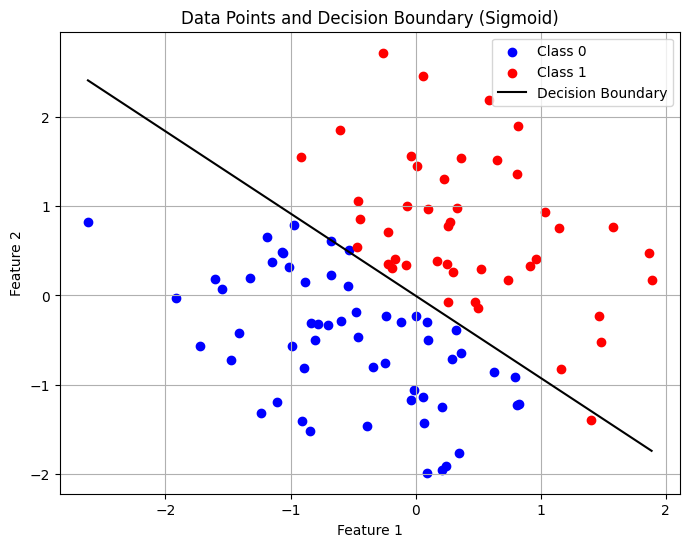

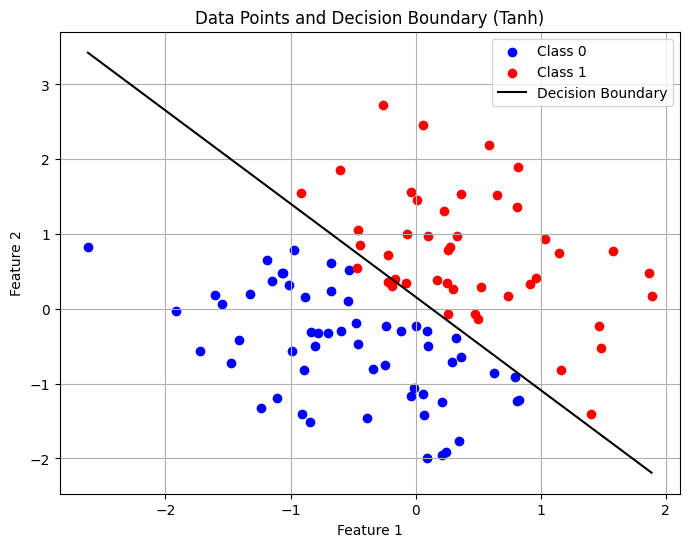

In [9]:
plot_data_and_boundary(X, y, W_sigmoid, b_sigmoid, "Sigmoid")

plot_data_and_boundary(X, y, W_tanh, b_tanh, "Tanh")